# Elastic Properties: A Quick Overview

<p>
In crystals, the mechanical properties such as stiffness, strength, and ductility depend on the crystallographic direction in which the material is deformed. This directional dependence is due to the crystal's internal structure and symmetry, which leads to anisotropy in mechanical properties. In this context, the elastic response of any material is fully described by its fourth-rank elastic tensor. <br>
    
CRYSTALClear contains functions to read the computed elastic tensor from an elastic CRYSTAL calculation and to compute and plot several directional mechanical properties (Young modulus, linear compressibility, shear modulus and Poisson ratio).
Please, note that the first essential step consists in running an elastic calculation with CRYSTAL by using the keyword ELASTCON (see the [User's Manual](https://www.crystal.unito.it/include/manuals/crystal23.pdf) for details).
Below, we will provide examples on how to exploit such functionalities referring to a prototypical calculation on coesite mineral.<br>
</p>

In [ ]:
pip install CRYSTALClear

In [1]:
from CRYSTALClear.crystal_io import Crystal_output
import CRYSTALClear.plot as CCplt 

<p>Now we need to create a CRYSTAL object (CO):</p>

In [12]:
CO = Crystal_output("coesite_ela.out")

<p>The elastic tensor can be extracted by acting on such CO with the <em>get_elatensor()</em> method:</p>

In [13]:
CO.get_elatensor()

<p>Upon inspection, the variable is a 6x6 NumPy array, precisely as expected.</p>

In [14]:
CO.elatensor

array([[136.888,  54.741,  68.835,   0.   ,  31.823,   0.   ],
       [ 54.741, 205.003,  39.186,   0.   , -11.896,   0.   ],
       [ 68.835,  39.186, 197.021,   0.   ,  29.908,   0.   ],
       [  0.   ,   0.   ,   0.   ,  43.406,   0.   , -10.035],
       [ 31.823, -11.896,  29.908,   0.   ,  65.37 ,   0.   ],
       [  0.   ,   0.   ,   0.   , -10.035,   0.   ,  57.046]])

<p>Before we proceed further, it would be useful to introduce some graphical representations of key geometrical parameters that will be referenced later. As we will see, some quantities depend on a single direction $\mathbf{u}$ (and thus on two angles $\vartheta$ and $\varphi$ in spherical coordinates), while others depend on two directions $\mathbf{u}$ and $\mathbf{v}$ (if orthogonal, the two directions can be defined in terms of three angles $\vartheta$, $\varphi$, and $\chi$ in spherical coordinates).</p>

<img src="elavectors.png" width=600 height=60 />

### Young Modulus

<p>The Young modulus is a property that describes the stiffness or elasticity of a material, which is defined as the ratio of stress (force per unit area) to strain (change in length per unit length) under an applied load. For each direction (i.e., for each pair of $\vartheta$ and $\varphi$ angles), the value of Young modulus can be computed as:</p>

\begin{equation}
E(\vartheta, \varphi) = \frac{1} {u_i u_j u_k u_l S_{ijkl}}
\end{equation}

<p>where $S_{ijkl}$ is an element of the inverse of the elastic tensor and the Einstein summation convention on repeated indices has been adopted.<br>
In order to get a three-dimensional representation of the Young modulus, we can simply use the <em>plot_cry_ela()</em> function as shown below:  
</p>

([<Figure size 640x480 with 2 Axes>],
 [<Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>],
 [<module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>])

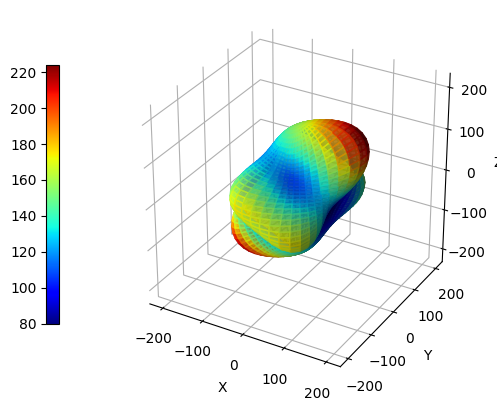

In [18]:
CCplt.plot_cry_ela(CO, "young", ndeg=50)

<p>In this case, the function requires three arguments:<br>
    1. a string which specifies the type of quantity that must be plotted (i.e., <em>"young"</em> for Young modulus)<br>
    2. the angular resolution of the plot (higher values corresponds to higher definition as well as higher rendering time);<br>
    3. a 6x6 numpy array containing the elastic tensor of the system (i.e., <em>elatensor</em>)<br>
</p>

### Linear Compressibility

<p>The linear compressibility describes the linear strain under the application of an external hydrostatic stress. For each direction (i.e., for each pair of $\vartheta$ and $\varphi$ angles), the value of linear compressibility can be computed as:</p>

\begin{equation}
\beta(\vartheta, \varphi) = S_{ijkl} u_i u_j
\end{equation}

<p>Also in this case, in order to get the desired plot, we can use a syntax similar to the one presented above:</p>

([<Figure size 640x480 with 2 Axes>],
 [<Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>],
 [<module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>])

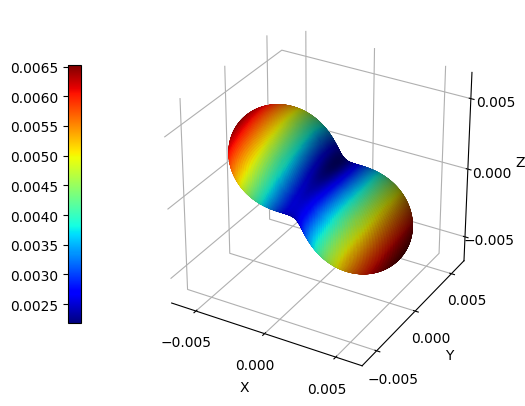

In [7]:
CCplt.plot_cry_ela(CO, "comp", ndeg=200)

### Shear Modulus

Shear modulus is a measure of the elastic shear stiffness, which describes the strain response to a shear stress. Its value depends on two different directions (described by $\vartheta$, $\varphi$ and $\chi$ angles) and can be evaluated as:

\begin{equation}
G(\vartheta, \varphi, \chi) = \frac{1} {u_i v_j u_k v_l S_{ijkl}}
\end{equation}

<p>A three-dimensional representation of a quantity that depends on three variables is not trivial. A popular strategy involves computing the shear modulus for all values of the angle $\chi$ along each direction (i.e., for each pair of $\vartheta$ and $\varphi$ angles), and then storing the maximum (<em>max</em>), minimum (<em>min</em>) and average (<em>avg</em>) values.<br>
Suppose we are interested in the computation of the minimum values of shear modulus, thus the following syntax must be adopted:</p>

([<Figure size 640x480 with 2 Axes>],
 [<Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>],
 [<module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>])

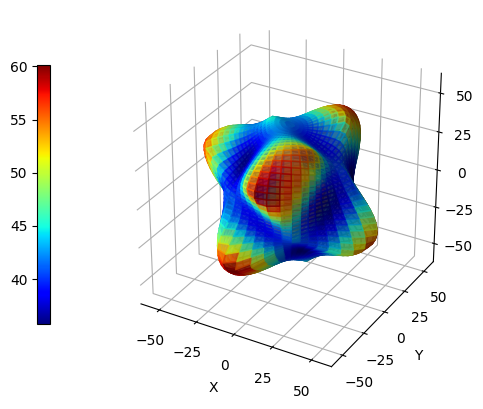

In [20]:
CCplt.plot_cry_ela(CO, "shear min", ndeg=50)

### Poisson Ratio

The last subject of this tutorial is the directional Poisson ratio, a quantity defined as the ratio of the transverse strain (i.e., the change in width or thickness) to the axial strain (i.e., the change in length) when a force is applied in a specific direction. In other words, if a material is stretched in one direction, the directional Poisson ratio tells us how much it will contract in the perpendicular direction. Just like for the shear modulus, its value depends on two directions and can be computed as:

\begin{equation}
\nu (\vartheta, \varphi, \chi) = \frac {u_i u_j v_k v_l S_{ijkl}} {u_i u_j u_k u_l S_{ijkl}}
\end{equation}

A plotting strategy analogous to the one described above has been implemented. Thus, if we want to plot the average Poisson ratio of coesite, we use the following syntax:

([<Figure size 640x480 with 2 Axes>],
 [<Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>],
 [<module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>])

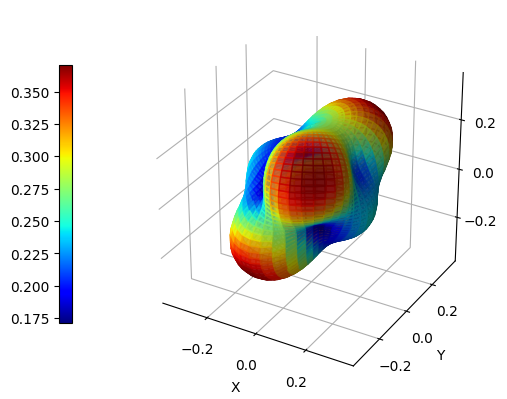

In [22]:
CCplt.plot_cry_ela(CO, "poisson avg", ndeg=50)

### Comparison Between Plots

<p>By providing multiple elastic tensors, it becomes possible to establish a fixed color scale that can be used consistently throughout various plots. This means that instead of having varying color scales for each plot, which can lead to confusion and misinterpretation of data, a single reference color scale can be used as a benchmark for all plots.<br>
For instance, one can be interested in evaluating the effect of pressure on the Young modulus of a certain material. Let us suppose we have previously run several elastic calculations on ZIF-8 with CRYSTAL at different values of pressure in range 0-0.4 GPa.<br>
    
Let's create a list of CRYSTAL objects: </p>


In [15]:
file_list = ["ZIF8_P0.out", "ZIF8_P01.out", "ZIF8_P02.out", "ZIF8_P03.out", "ZIF8_P04.out"]
COs = []
for file in file_list:
    COs.append(Crystal_output(file))

<p>Then, we can easily extract our elastic tensors:</p>

In [16]:
for i in range(5):
    COs[i].get_elatensor()

<p>We are now ready to plot them through this simple syntax!<p>

([<Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>],
 [<Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>,
  <Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>,
  <Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>,
  <Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>,
  <Axes3DSubplot: xlabel='X', ylabel='Y', zlabel='Z'>],
 [<module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
  <module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
  <module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
  <module 'matplotlib.pyplot' from '/Users/davidemitoli/miniconda3/envs/develop/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
  <module 

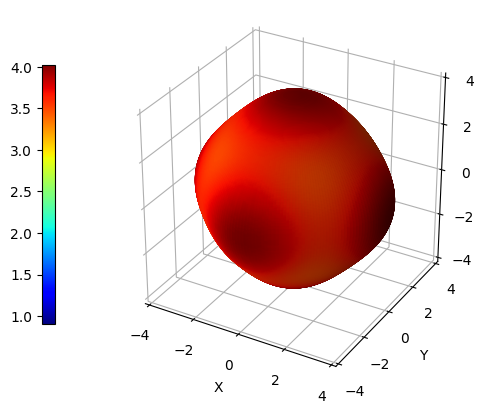

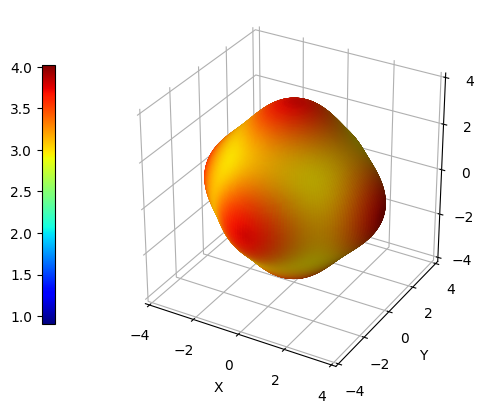

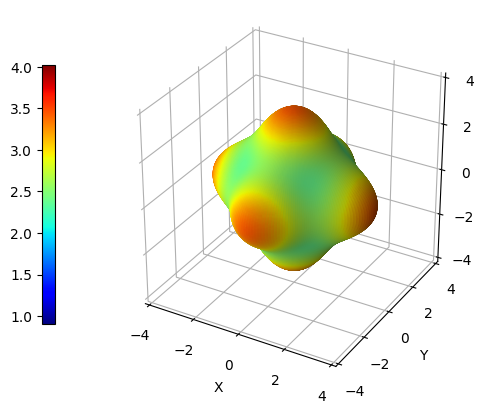

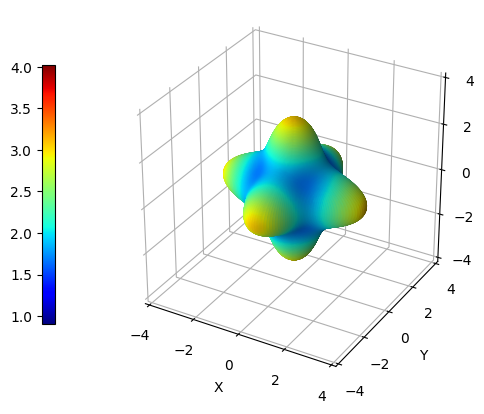

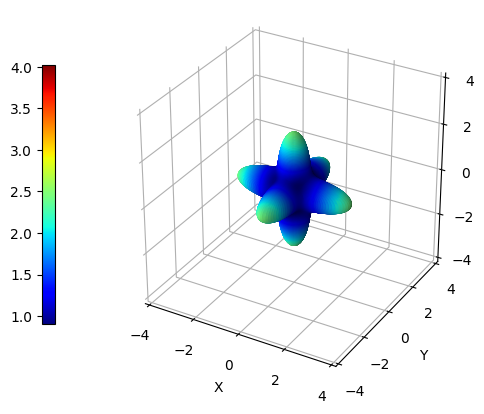

In [17]:
CCplt.plot_cry_ela([COs[0], COs[1], COs[2], COs[3], COs[4]], "young", ndeg=200)

<p>Although <em>plot_cry_ela()</em> function is able to handle any number of COs provided as arguments, the computation of properties depending on two directions (i.e., shear modulus and Poisson ratio) is quite demanding from a computational point of view - just take a cup of tea and enjoy.<br>
</p>

| Quantity               | Description                   | String                                           |
| :---                   | :----                         | :---                                            |
| Young Modulus          |                               | `young`                                         |
| Linear Compressibility |                               | `comp`                                          |
| Shear Modulus          | maximum<br>minimum<br>average | `shear max`<br>`shear min`<br>`shear avg`       |
| Poisson Ratio          | maximum<br>minimum<br>average | `poisson max`<br>`poisson min`<br>`poisson avg` |